In [1]:
# !pip install pandas matplotlib numpy

In [2]:
import os
from pathlib import Path
from tabulate import tabulate

from plotter import *
from plotter.epochstats import EpochStats
from plotter.plotepochstats import PlotRangeQueryStats, PlotEpochStats, plot_total_data_movement
from plotter.plotselectivities import PlotSelectivities, PlotSelectivitiesRangeQuery
from plotter.utils import vanilla_dirname, rqdc_dirname
from plotter.dataclass import TABLE_DATA, Metric

PROJECT_DIR = Path.cwd().parent.parent

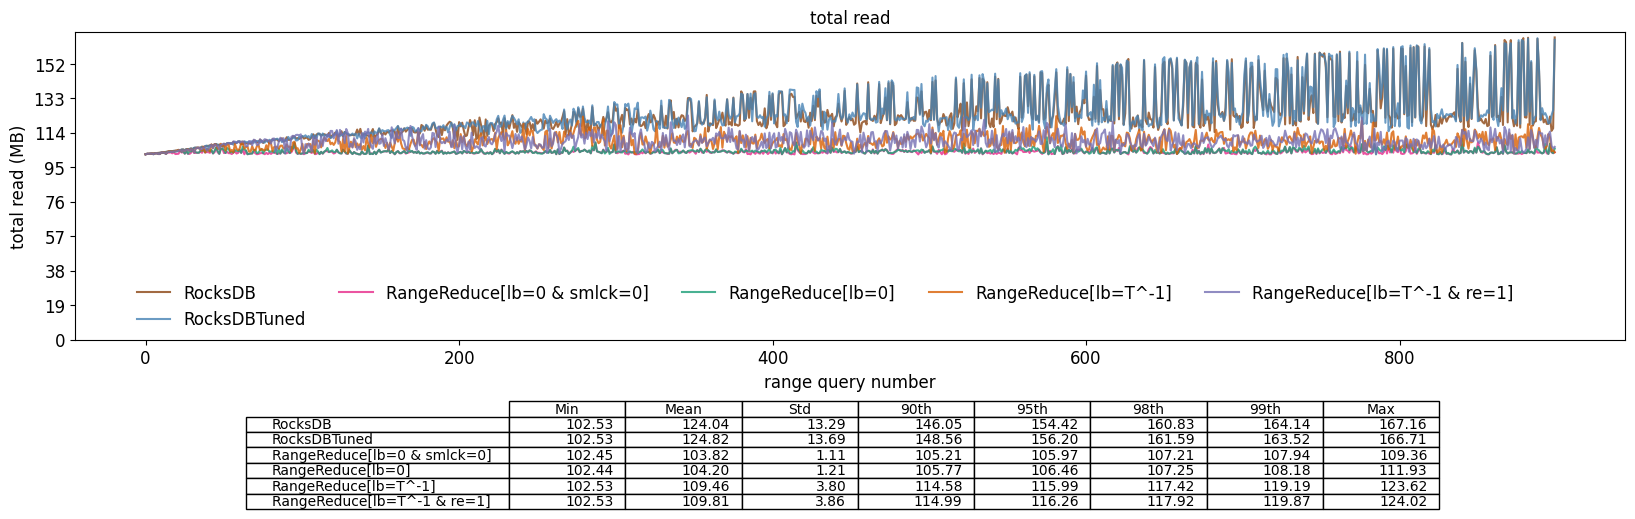

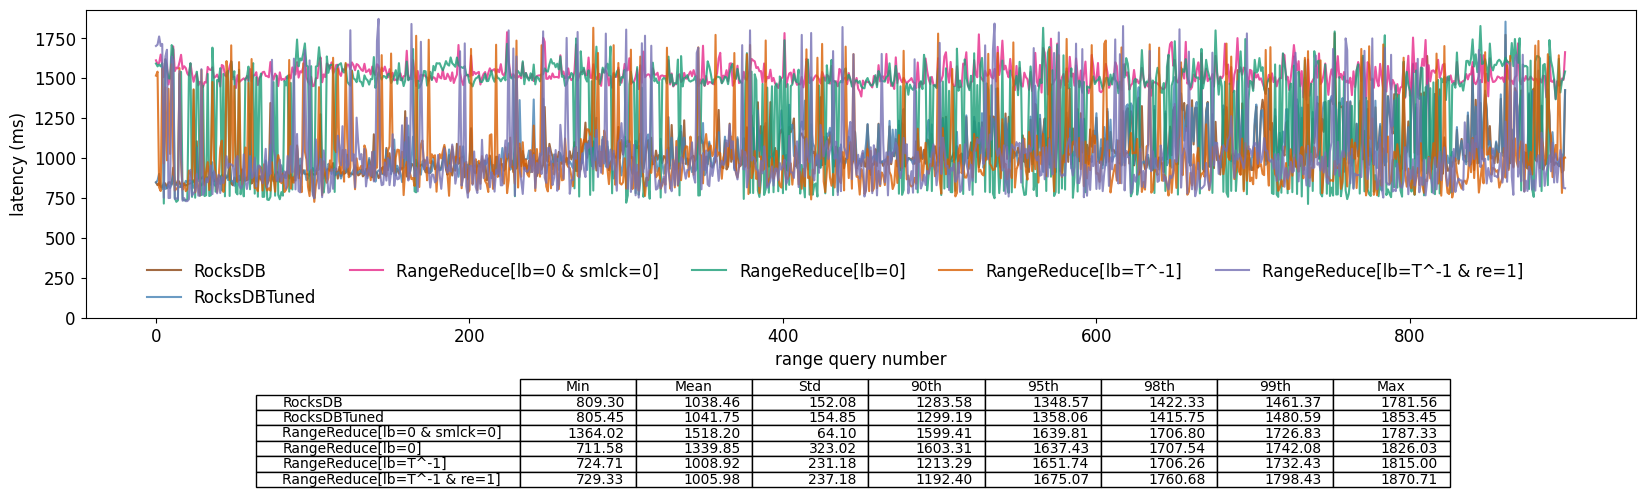

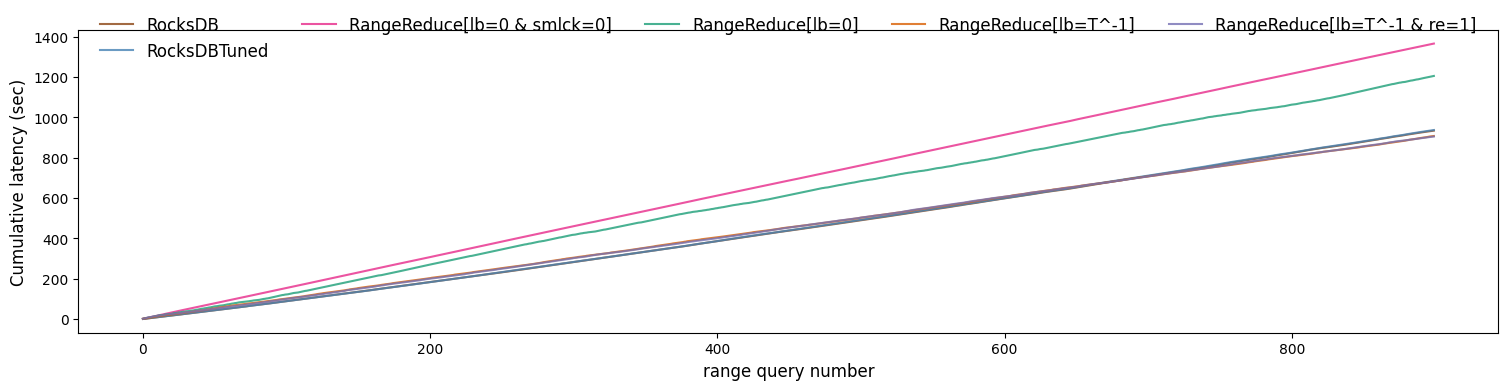

/home/cc/LSMQueryDrivenCompaction/src/.notebooks/plotter/plotepochstats.py:142: RuntimeWarning: invalid value encountered in scalar divide
  avg_bytes_written_by_RR[approach] = [plot_stat[0].RangeReduceWrittenBytes / (TABLE_DATA[approach][str(Metric.RR_TRIGGERED_COUNT)] * 1024**2)]


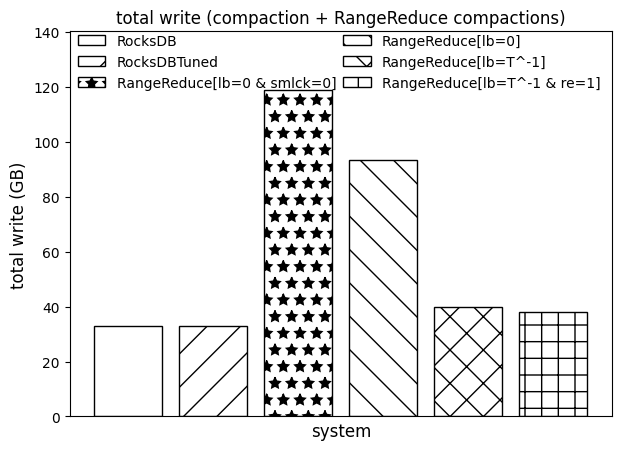

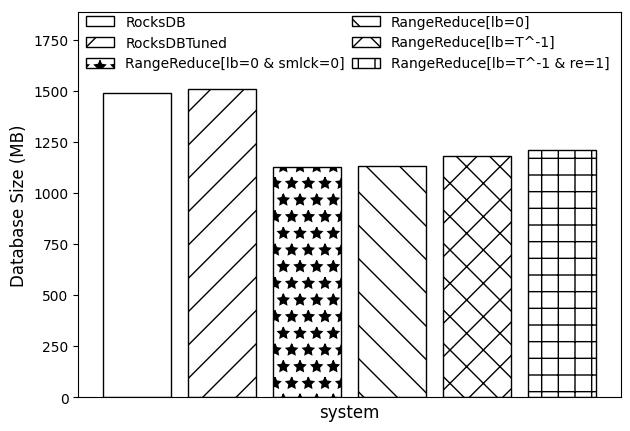

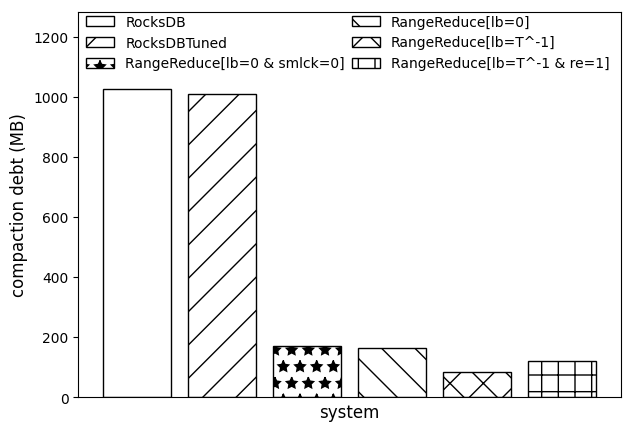

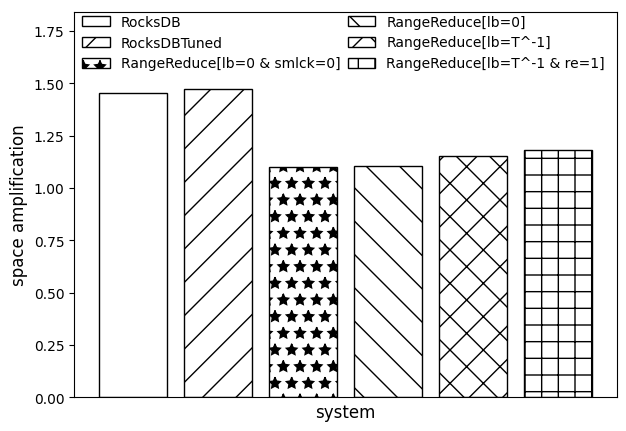

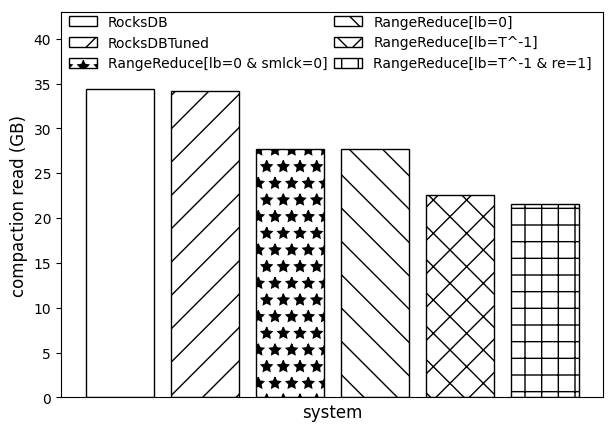

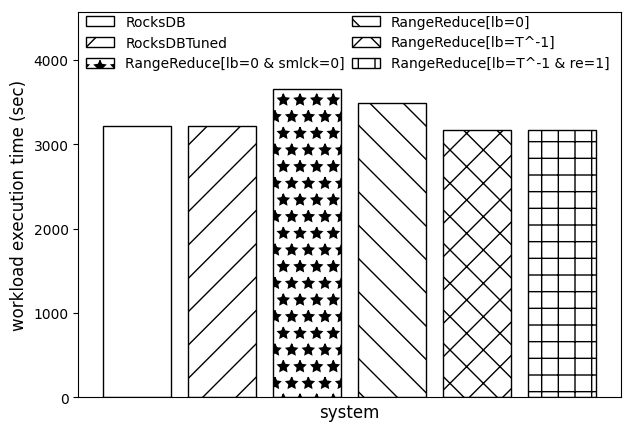

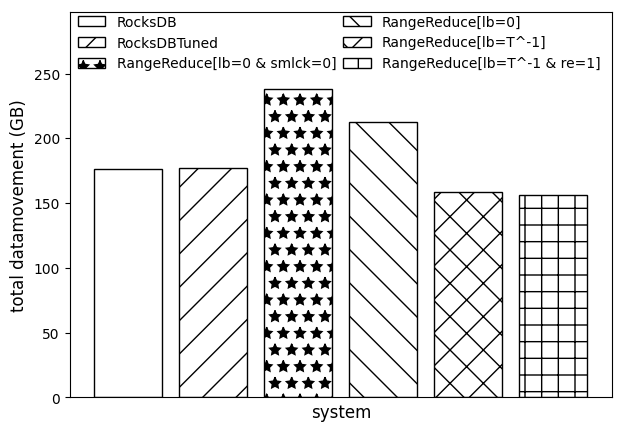

| Method                      | tot. writes (GB)   | s. amp.   | comp. debt. (MB)   | RQ lat. (avg ms)   | overall data mov. (GB)   | w/l exec. time (sec)   |   # RR trig |   avg. fsize | tot. fcount   | avg. bytes read RQ (MB)   |   avg. bytes written RR (MB) | tot. comp. read (Not RR) (GB)   | tail RQ lat. 98   | tail RQ lat. 100   |
|-----------------------------|--------------------|-----------|--------------------|--------------------|--------------------------|------------------------|-------------|--------------|---------------|---------------------------|------------------------------|---------------------------------|-------------------|--------------------|
| RocksDB                     | 33.1               | 1.45      | 1025.71            | 1038.46            | 176.46                   | 3220.33                |           0 |      3.71722 | 400           | 124.04                    |                     nan      | 34.34                           | 1422.33           | 1781.56

In [3]:
random_rq_stats = dict()
random_rq_stats_for_rq = dict()

lb = 1 / SIZE_RATIO
EXPDIRNAME = f"{PROJECT_DIR}/.vstats/experiments-{TAG}-U{UPDATES}-E{ENTRY_SIZE}-B{ENTRIES_PER_PAGE}-P{NUM_PAGE_PER_FILE}-S{RANGE_QUERIES}-Y{SELECTIVITY}-T{SIZE_RATIO}"

rocksdb_dirpath = os.path.join(EXPDIRNAME, "RocksDB")
rocksdb_tuned_dirpath = os.path.join(EXPDIRNAME, "RocksDBTuned")
rr_lb0_smlck0_dirpath = os.path.join(EXPDIRNAME, "RangeReduce[lb=0ANDsmlck=0]")
rr_lb0_dirpath = os.path.join(EXPDIRNAME, "RangeReduce[lb=0]")
rr_lb_1_by_T_dirpath = os.path.join(EXPDIRNAME, "RangeReduce[lb=T^-1]")
rr_lb_1_by_T_and_re_1_dirpath = os.path.join(EXPDIRNAME, "RangeReduce[lb=T^-1ANDre=1]")

filesize = ENTRY_SIZE * ENTRIES_PER_PAGE * NUM_PAGE_PER_FILE

rocksdb = EpochStats(rocksdb_dirpath, NUMEPOCHS, filesize)
rocksdb_tuned = EpochStats(rocksdb_tuned_dirpath, NUMEPOCHS, filesize)
rr_lb_0_smlck_0 = EpochStats(rr_lb0_smlck0_dirpath, NUMEPOCHS, filesize)
rr_lb_0 = EpochStats(rr_lb0_dirpath, NUMEPOCHS, filesize)
rr_lb_1_by_T = EpochStats(rr_lb_1_by_T_dirpath, NUMEPOCHS, filesize)
rr_lb_1_by_T_and_re_1 = EpochStats(rr_lb_1_by_T_and_re_1_dirpath, NUMEPOCHS, filesize)

plot_exp = PlotRangeQueryStats(
    {
        "RocksDB": rocksdb.get_rangequerystats(),
        "RocksDBTuned": rocksdb_tuned.get_rangequerystats(),
        "RangeReduce[lb=0 & smlck=0]": rr_lb_0_smlck_0.get_rangequerystats(),
        "RangeReduce[lb=0]": rr_lb_0.get_rangequerystats(),
        "RangeReduce[lb=T^-1]": rr_lb_1_by_T.get_rangequerystats(),
        "RangeReduce[lb=T^-1 & re=1]": rr_lb_1_by_T_and_re_1.get_rangequerystats(),
    }
)
plot_exp.bytes_read_for_each_range_query()
plot_exp.latency_for_each_range_query()
plot_exp.cummulative_latency_for_range_queries()

metric_exp = PlotEpochStats(
    {
        "RocksDB": rocksdb.get_plotstats(),
        "RocksDBTuned": rocksdb_tuned.get_plotstats(),
        "RangeReduce[lb=0 & smlck=0]": rr_lb_0_smlck_0.get_plotstats(),
        "RangeReduce[lb=0]": rr_lb_0.get_plotstats(),
        "RangeReduce[lb=T^-1]": rr_lb_1_by_T.get_plotstats(),
        "RangeReduce[lb=T^-1 & re=1]": rr_lb_1_by_T_and_re_1.get_plotstats(),
    }
)
metric_exp.plot_total_bytes_written()
metric_exp.plot_database_size()
metric_exp.plot_compaction_debt()
metric_exp.plot_space_amplification()
metric_exp.plot_compaction_read()
metric_exp.plot_workload_exec_time()
plot_total_data_movement(
    {
        "RocksDB": rocksdb.get_plotstats(),
        "RocksDBTuned": rocksdb_tuned.get_plotstats(),
        "RangeReduce[lb=0 & smlck=0]": rr_lb_0_smlck_0.get_plotstats(),
        "RangeReduce[lb=0]": rr_lb_0.get_plotstats(),
        "RangeReduce[lb=T^-1]": rr_lb_1_by_T.get_plotstats(),
        "RangeReduce[lb=T^-1 & re=1]": rr_lb_1_by_T_and_re_1.get_plotstats(),
    },
    {
        "RocksDB": rocksdb.get_rangequerystats(),
        "RocksDBTuned": rocksdb_tuned.get_rangequerystats(),
        "RangeReduce[lb=0 & smlck=0]": rr_lb_0_smlck_0.get_rangequerystats(),
        "RangeReduce[lb=0]": rr_lb_0.get_rangequerystats(),
        "RangeReduce[lb=T^-1]": rr_lb_1_by_T.get_rangequerystats(),
        "RangeReduce[lb=T^-1 & re=1]": rr_lb_1_by_T_and_re_1.get_rangequerystats(),
    },
)

rows = []
ordered_columns = ["Method"] + [metric.value[0] for metric in Metric]

for method, metrics in TABLE_DATA.items():
    row = {"Method": method}
    row.update(metrics)
    rows.append(row)

ordered_rows = []
for row in rows:
    ordered_row = {col: row.get(col, "") for col in ordered_columns}
    ordered_rows.append(ordered_row)

markdown_table = tabulate(ordered_rows, headers="keys", tablefmt="github")
print(markdown_table)

In [4]:
markdown_table = tabulate(ordered_rows, headers="keys", tablefmt="latex")
print(markdown_table)

\begin{tabular}{lllllllrrllrlll}
\hline
 Method                      & tot. writes (GB)   & s. amp.   & comp. debt. (MB)   & RQ lat. (avg ms)   & overall data mov. (GB)   & w/l exec. time (sec)   &   \# RR trig &   avg. fsize & tot. fcount   & avg. bytes read RQ (MB)   &   avg. bytes written RR (MB) & tot. comp. read (Not RR) (GB)   & tail RQ lat. 98   & tail RQ lat. 100   \\
\hline
 RocksDB                     & 33.1               & 1.45      & 1025.71            & 1038.46            & 176.46                   & 3220.33                &           0 &      3.71722 & 400           & 124.04                    &                     nan      & 34.34                           & 1422.33           & 1781.56            \\
 RocksDBTuned                & -0.41\%             & 1.32\%     & -1.44\%             & 0.32\%              & 0.22\%                    & 0.06\%                  &           0 &      3.74763 & 0.5\%          & 0.63\%                     &                     nan      & -0.46\